In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/Deep Learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered.zip')


68616192/68606236 [==============================] - 1s 0us/step


In [ ]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
PATH

'/content/drive/MyDrive/Deep Learning/CNN/cats_and_dogs.zip'

In [ ]:
# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')

# PATH = r"//content//drive//MyDrive//Deep_Learning//CNN//cats_and_dogs.zip"
# New_PATH = r"//content//drive//MyDrive//Deep_Learning//CNN//cats_and_dogs"

# !unzip $PATH -d $New_PATH


In [3]:
dataPath = '/content/drive/MyDrive/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [4]:
train_dir = os.path.join(dataPath, 'train')

In [5]:
validation_dir = os.path.join(dataPath, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics

In [7]:
n_train_cat = len(os.listdir(train_cats_dir))
n_train_dog = len(os.listdir(train_dogs_dir))
n_validation_cat = len(os.listdir(validation_cats_dir))
n_validation_dog = len(os.listdir(validation_dogs_dir))

total_train = n_train_cat + n_train_dog
total_validation = n_validation_cat + n_validation_dog

In [ ]:
count = [n_train_cat, n_train_dog, n_validation_cat, n_validation_dog, total_train, total_validation]
length = ['training cats','training dogs','validation cats', 'validation dogs', 'trainng images','validation images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of training cats is 1000
----------------------------------------------------------------------------------------------------
Total counts of training dogs is 1000
----------------------------------------------------------------------------------------------------
Total counts of validation cats is 500
----------------------------------------------------------------------------------------------------
Total counts of validation dogs is 500
----------------------------------------------------------------------------------------------------
Total counts of trainng images is 2000
----------------------------------------------------------------------------------------------------
Total counts of validation images is 1000
----------------------------------------------------------------------------------------------------


In [8]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data

In [10]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


In [11]:
validation_data_gen= validation_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = validation_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"


Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, check = next(train_data_gen)

In [ ]:
len(sample_training_images)

128

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


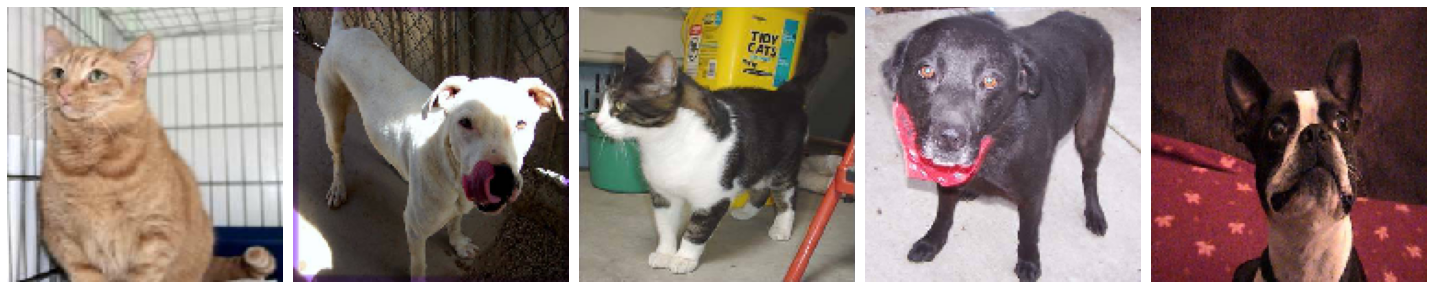

In [14]:
plotImages(sample_training_images[4:9])

In [15]:
model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1, activation='sigmoid')
])


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
#Model fit

history = model.fit( train_data_gen,
                                          steps_per_epoch = total_train//batch_size,
                                          epochs = 200,
                                          validation_data = validation_data_gen,
                                          validation_steps = total_validation//batch_size
    
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 12s 804ms/step - loss: 0.8872 - accuracy: 0.4899 - val_loss: 0.6916 - val_accuracy: 0.5692
Epoch 2/200
15/15 [==============================] - 12s 800ms/step - loss: 0.6791 - accuracy: 0.5732 - val_loss: 0.6662 - val_accuracy: 0.5904
Epoch 3/200
15/15 [==============================] - 11s 760ms/step - loss: 0.6399 - accuracy: 0.6357 - val_loss: 0.6285 - val_accuracy: 0.6317
Epoch 4/200
15/15 [==============================] - 11s 768ms/step - loss: 0.5907 - accuracy: 0.7046 - val_loss: 0.5858 - val_accuracy: 0.6864
Epoch 5/200
15/15 [==============================] - 11s 763ms/step - loss: 0.5160 - accuracy: 0.7532 - val_loss: 0.5607 - val_accuracy: 0.7188
Epoch 6/200
15/15 [==============================] - 11s 766ms/step - loss: 0.5117 - accuracy: 0.7618 - val_loss: 0.5851 - val_accuracy: 0.6920
Epoch 7/200
15/15 [==============================] - 12s 820ms/step - loss: 0.4356 - accuracy: 0.8120 - val_loss: 0.5715 - val_accuracy: 0.7031
Epoc

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

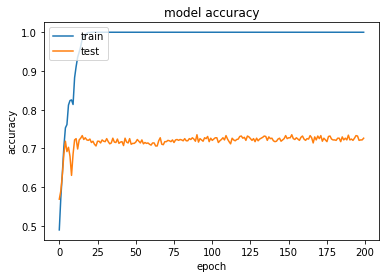

In [ ]:
# summarize history for accuracy


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


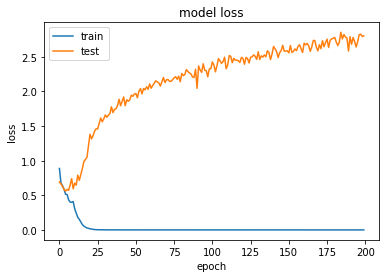

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Predict with new data
# import math

# def sigmoid(x):
#   return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Deep_Learning/CNN/cat.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model.predict([im])
# pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")



Dog


In [ ]:
pred[0][0]

1.0759698

In [18]:
model.save('/content/drive/MyDrive/Deep_Learning/CNN/class.h5')

In [20]:
from keras.models import load_model
model_h5 = load_model("/content/drive/MyDrive/Deep_Learning/CNN/class.h5")


#Data Augmentation

In [ ]:
train_images_horizontal = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_images_horizontal_gen = train_images_horizontal.flow_from_directory( batch_size = batch_size,
                                                                           directory = train_dir,
                                                                          shuffle=True,
                                                                          target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                          class_mode='binary' 
)

Found 2000 images belonging to 2 classes.


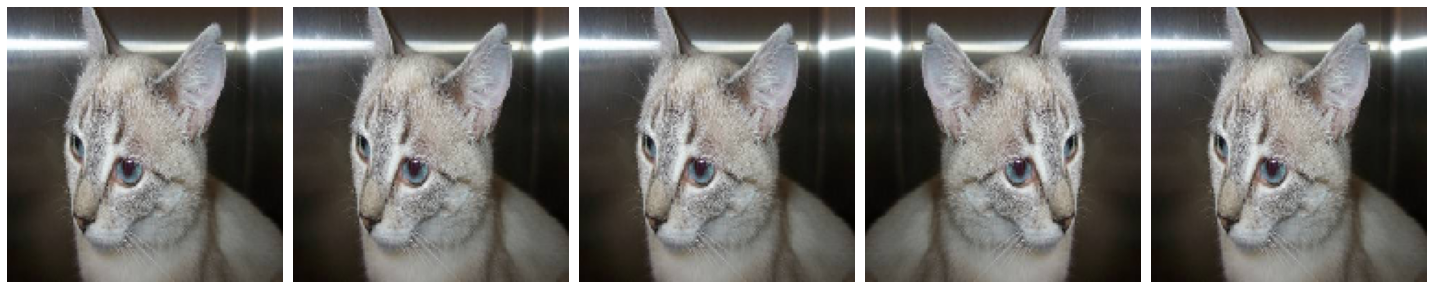

In [ ]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
#Rptating image

train_images_rotated = ImageDataGenerator(rescale=1./255, rotation_range=50)
train_images_rotated_gen = train_images_rotated.flow_from_directory( batch_size = batch_size,
                                                                           directory = train_dir,
                                                                          shuffle=True,
                                                                          target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                          class_mode='binary' 
)

Found 2000 images belonging to 2 classes.


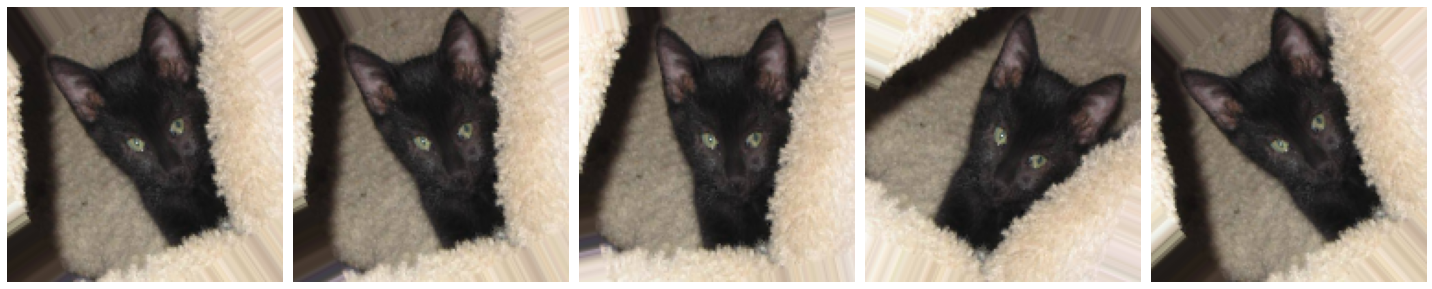

In [ ]:
augmented_images = [train_images_rotated_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
#Zoom image

train_images_zoom = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_images_zoom_gen = train_images_zoom.flow_from_directory( batch_size = batch_size,
                                                                           directory = train_dir,
                                                                          shuffle=True,
                                                                          target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                          class_mode='binary' 
)

Found 2000 images belonging to 2 classes.


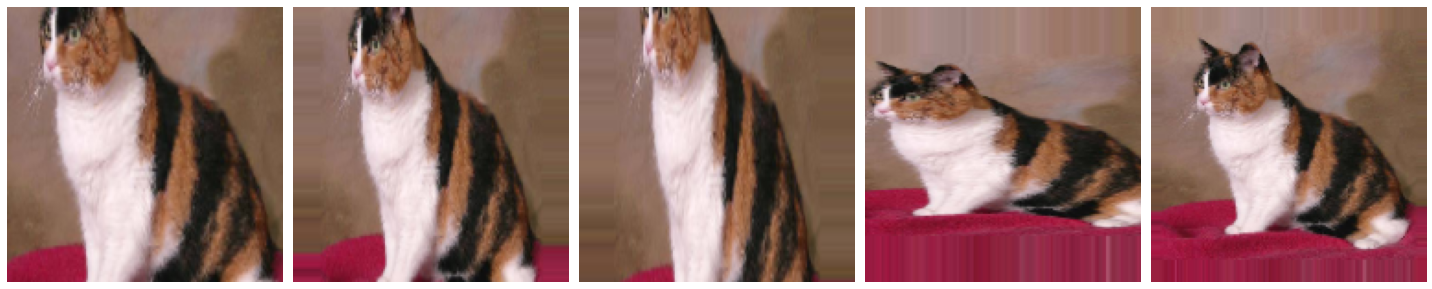

In [ ]:
augmented_images = [train_images_zoom_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
train_image_generator= ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True,
                                        zoom_range=0.5,
                                         width_shift_range=0.15,
                                          height_shift_range=0.15 )

In [ ]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


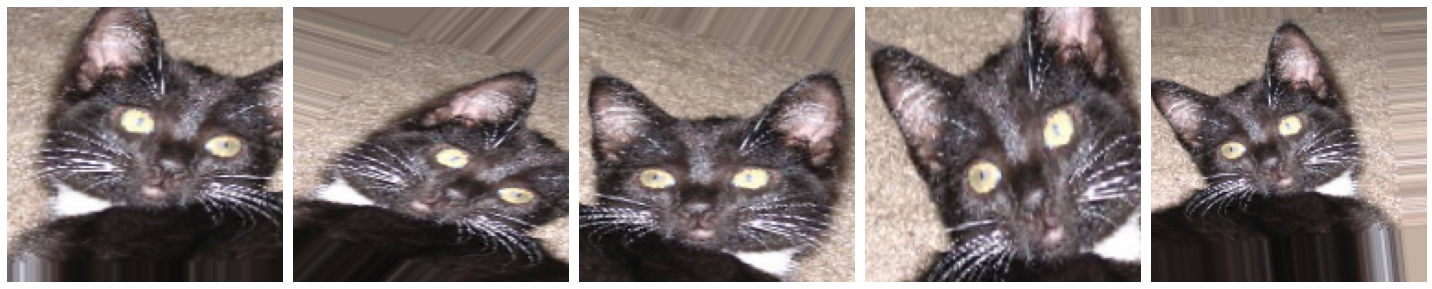

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model_new= Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [ ]:
history1 = model.fit( train_data_gen,
                    steps_per_epoch=total_train//batch_size,
                    epochs=30,
                    validation_data=validation_data_gen,
                    validation_steps=total_validation//batch_size
    
)


Epoch 1/30
15/15 [==============================] - 21s 1s/step - loss: 1.2670 - accuracy: 0.5230 - val_loss: 0.6937 - val_accuracy: 0.4944
Epoch 2/30
15/15 [==============================] - 20s 1s/step - loss: 0.6934 - accuracy: 0.5085 - val_loss: 0.6912 - val_accuracy: 0.4900
Epoch 3/30
15/15 [==============================] - 19s 1s/step - loss: 0.6902 - accuracy: 0.5043 - val_loss: 0.6921 - val_accuracy: 0.5033
Epoch 4/30
15/15 [==============================] - 20s 1s/step - loss: 0.6918 - accuracy: 0.4990 - val_loss: 0.6900 - val_accuracy: 0.5045
Epoch 5/30
15/15 [==============================] - 19s 1s/step - loss: 0.6911 - accuracy: 0.5021 - val_loss: 0.6873 - val_accuracy: 0.5056
Epoch 6/30
15/15 [==============================] - 21s 1s/step - loss: 0.6876 - accuracy: 0.4989 - val_loss: 0.6813 - val_accuracy: 0.4911
Epoch 7/30
15/15 [==============================] - 19s 1s/step - loss: 0.6875 - accuracy: 0.5144 - val_loss: 0.6766 - val_accuracy: 0.5123
Epoch 8/30
15/15 [==